In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE

In [47]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\roman.moiseev\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_csv(r'data/train_v3_drcat_02.csv')

In [6]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ\s]', '', text) 
    text = text.lower()
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [7]:
df['text'] = df['text'].apply(clean_text)

In [8]:
df.columns

Index(['text', 'label', 'prompt_name', 'source', 'RDizzl3_seven', 'model'], dtype='object')

In [9]:
df['prompt_name'].value_counts()

prompt_name
Car-free cities                  1959
Summer projects                  1750
Phones and driving               1168
"A Cowboy Who Rode the Waves"     123
Name: count, dtype: int64

In [10]:
df['source'].value_counts()

source
persuade_corpus    5000
Name: count, dtype: int64

In [11]:
df['model'].value_counts()

model
human    5000
Name: count, dtype: int64

In [12]:
df

,text,label,prompt_name,source,RDizzl3_seven,model
0,phones modern humans today always phone always...,0,Phones and driving,persuade_corpus,False,human
1,essay explain drivers able use electronic devi...,0,Phones and driving,persuade_corpus,False,human
2,driving use cellular devices today society tho...,0,Phones and driving,persuade_corpus,False,human
3,phones driving drivers able use phones operati...,0,Phones and driving,persuade_corpus,False,human
4,cell phone operation driving ability stay conn...,0,Phones and driving,persuade_corpus,False,human
...,...,...,...,...,...,...
4995,hello everyone luke seagoing cowboy today thin...,0,"""A Cowboy Who Rode the Waves""",persuade_corpus,True,human
4996,live america would join seagoing cowboys after...,0,"""A Cowboy Who Rode the Waves""",persuade_corpus,True,human
4997,good reason people join seagoing cowboys progr...,0,"""A Cowboy Who Rode the Waves""",persuade_corpus,True,human
4998,theres nothing better seagoing cowboys program...,0,"""A Cowboy Who Rode the Waves""",persuade_corpus,True,human


In [13]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['avg_word_length'] = df['text'].apply(lambda x: np.mean([len(word) for word in re.findall(r'\w+', x)]))

df['unique_words'] = df['text'].apply(lambda x: len(set(re.findall(r'\w+', x.lower()))))
df['unique_ratio'] = df['unique_words'] / df['text'].apply(lambda x: len(re.findall(r'\w+', x.lower())))

In [14]:
df['text_length'].min()

np.int64(32)

In [15]:
df['text_length'].max()

np.int64(814)

In [16]:
df['text_length'].mean()

np.float64(254.7898)

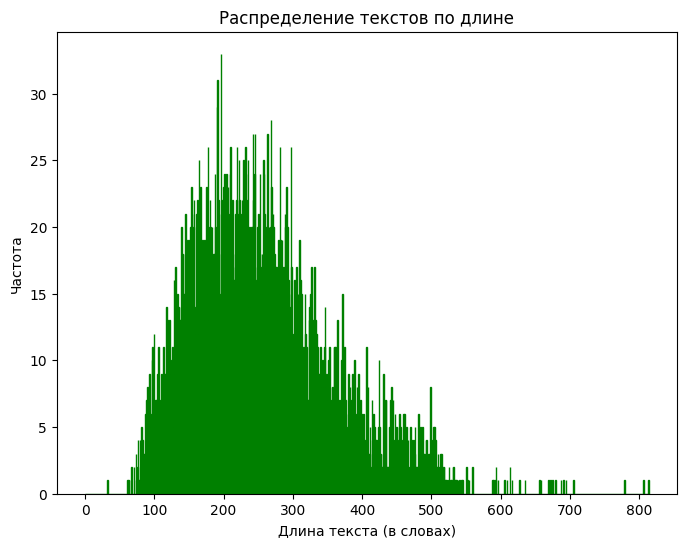

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['text_length'], bins=range(0, df['text_length'].max() + 1), edgecolor='green')
plt.xlabel('Длина текста (в словах)')
plt.ylabel('Частота')
plt.title('Распределение текстов по длине')
plt.show()

In [18]:
all_text = ''.join(df['text']).replace(" ", "")
char_count = len(all_text)  
char_freq = Counter(all_text)

print(char_freq)

Counter({'e': 1045402, 's': 624159, 't': 599795, 'n': 555060, 'a': 542527, 'i': 523003, 'r': 516535, 'o': 483404, 'l': 373760, 'd': 335205, 'c': 333956, 'u': 267427, 'g': 242711, 'p': 234115, 'm': 207970, 'h': 182828, 'y': 128500, 'w': 109539, 'v': 105893, 'f': 88028, 'b': 87390, 'k': 81630, 'j': 39866, 'x': 21550, '0': 10421, '1': 6131, '2': 5786, 'q': 5658, 'z': 5095, '5': 3193, '3': 3013, '4': 2414, '7': 2181, '9': 2129, '6': 1963, '8': 1039})


In [23]:
all_words = ' '.join(df['text'])
words = all_words.split()

In [24]:
word_freq = Counter(words)  
print(word_freq)

Counter({'students': 28391, 'summer': 16470, 'driving': 15845, 'car': 15820, 'project': 15372, 'projects': 15078, 'people': 14797, 'would': 14338, 'cars': 13154, 'teachers': 8589, 'student': 8258, 'use': 7574, 'phone': 7496, 'time': 7488, 'get': 7398, 'also': 7377, 'many': 7168, 'school': 6751, 'work': 6641, 'one': 6345, 'could': 6054, 'teacher': 5971, 'make': 5939, 'phones': 5360, 'year': 5211, 'even': 5190, 'like': 5125, 'help': 4915, 'way': 4906, 'usage': 4852, 'cell': 4528, 'day': 4510, 'less': 4378, 'much': 4308, 'know': 4163, 'may': 4108, 'able': 4073, 'better': 4030, 'dont': 3998, 'life': 3953, 'world': 3928, 'design': 3906, 'learning': 3862, 'pollution': 3784, 'think': 3763, 'learn': 3750, 'air': 3730, 'break': 3724, 'want': 3719, 'need': 3704, 'using': 3661, 'take': 3652, 'designed': 3566, 'drivers': 3539, 'smog': 3521, 'texting': 3470, 'something': 3460, 'new': 3399, 'studentdesigned': 3248, 'good': 3124, 'road': 3117, 'go': 3017, 'limiting': 2985, 'without': 2971, 'things': 

In [25]:
bigrams = nltk.ngrams(words, 2)

bigram_freq = Counter([' '.join(bigram) for bigram in bigrams])

In [26]:
bigram_freq

Counter({'summer projects': 5586,
         'car usage': 3676,
         'texting driving': 2589,
         'cell phones': 2446,
         'limiting car': 2295,
         'summer project': 2264,
         'cell phone': 2030,
         'school year': 1736,
         'phones driving': 1610,
         'united states': 1573,
         'summer break': 1545,
         'phone driving': 1483,
         'students would': 1378,
         'many people': 1188,
         'without cars': 1184,
         'project would': 1094,
         'student designed': 1084,
         'air pollution': 1075,
         'summer assignments': 1016,
         'projects would': 986,
         'greenhouse gas': 977,
         'projects students': 969,
         'use cars': 956,
         'design summer': 940,
         'studentdesigned projects': 936,
         'design project': 924,
         'students design': 919,
         'design projects': 894,
         'teacher designed': 890,
         'use cell': 875,
         'projects studentdesigned': 

In [27]:
trigrams = nltk.ngrams(words, 3)

trigram_freq = Counter([' '.join(trigram) for trigram in trigrams])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [52]:
trigram_freq

Counter({'limiting car usage': 1937,
         'greenhouse gas emissions': 653,
         'use cell phones': 651,
         'summer projects studentdesigned': 619,
         'cell phones driving': 581,
         'design summer projects': 542,
         'advantages limiting car': 531,
         'car always tense': 506,
         'take away stress': 492,
         'im much happier': 484,
         'much happier way': 482,
         'cell phone use': 471,
         'tense im much': 468,
         'always tense im': 461,
         'partial driving ban': 445,
         'lower air pollution': 415,
         'stress lower air': 412,
         'away stress lower': 410,
         'driving ban clear': 385,
         'students complete summer': 382,
         'summer projects teacherdesigned': 379,
         'ban clear air': 376,
         'day without cars': 376,
         'goes without cars': 370,
         'life goes without': 365,
         'driving due smog': 360,
         'schools require students': 355,
         '

In [28]:
words_token = nltk.word_tokenize(all_words)

In [29]:
pos_tags = nltk.pos_tag(words_token, lang='eng')

pos_counts = Counter(tag for word, tag in pos_tags)

print(pos_counts)

Counter({'NN': 395764, 'NNS': 202981, 'JJ': 186635, 'VBG': 81853, 'VBP': 78977, 'RB': 76225, 'VB': 50568, 'VBD': 40102, 'VBN': 29977, 'MD': 27490, 'CD': 25440, 'IN': 24728, 'VBZ': 23369, 'JJR': 10225, 'RBR': 5445, 'DT': 4485, 'PRP': 3052, 'JJS': 2804, 'RP': 1474, 'CC': 1228, 'WDT': 406, 'FW': 308, 'RBS': 180, 'WRB': 138, 'TO': 138, 'NNP': 122, 'WP': 98, '$': 57, 'UH': 55, 'WP$': 46, 'POS': 41, 'PRP$': 36, 'SYM': 10, 'NNPS': 6, 'EX': 5, 'PDT': 4, "''": 2})


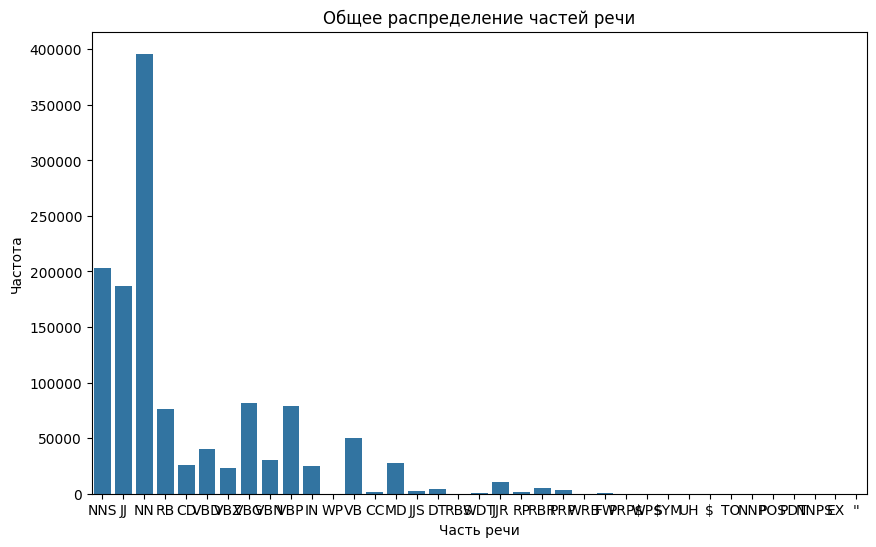

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=pos_counts.keys(), y=pos_counts.values())
plt.title("Общее распределение частей речи")
plt.xlabel("Часть речи")
plt.ylabel("Частота")
plt.show()

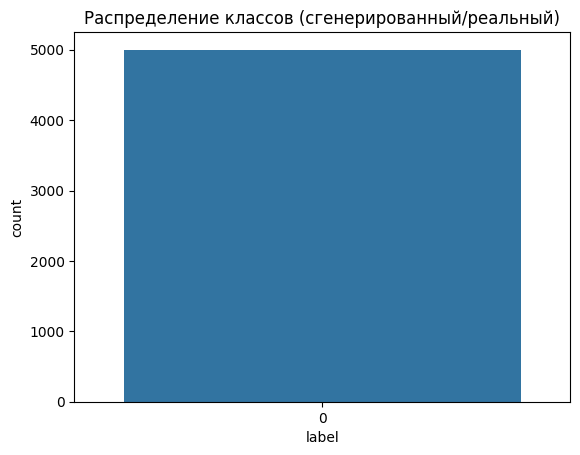

In [34]:
sns.countplot(data=df, x='label')
plt.title("Распределение классов (сгенерированный/реальный)")
plt.show()

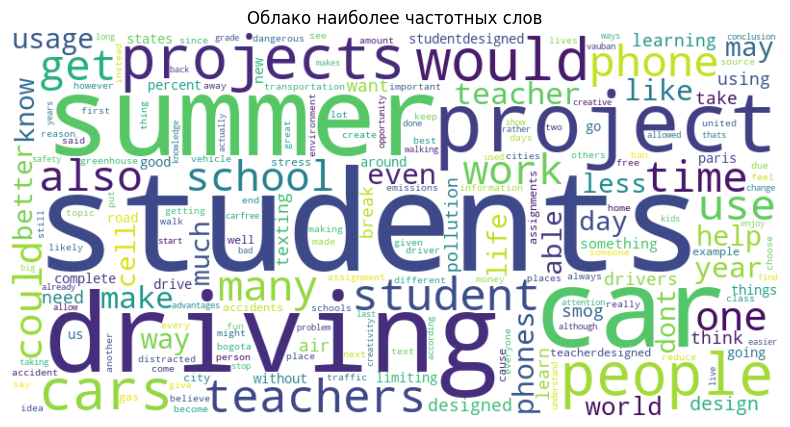

In [35]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных слов")
plt.show()

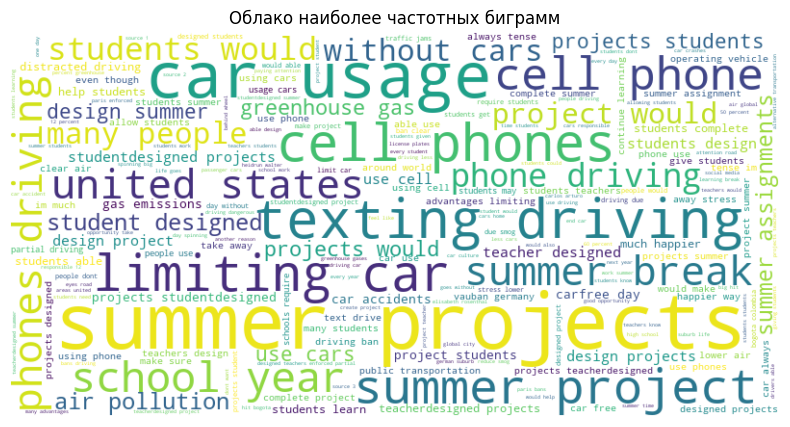

In [36]:
bigram_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_freq)
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Облако наиболее частотных биграмм")
plt.show()

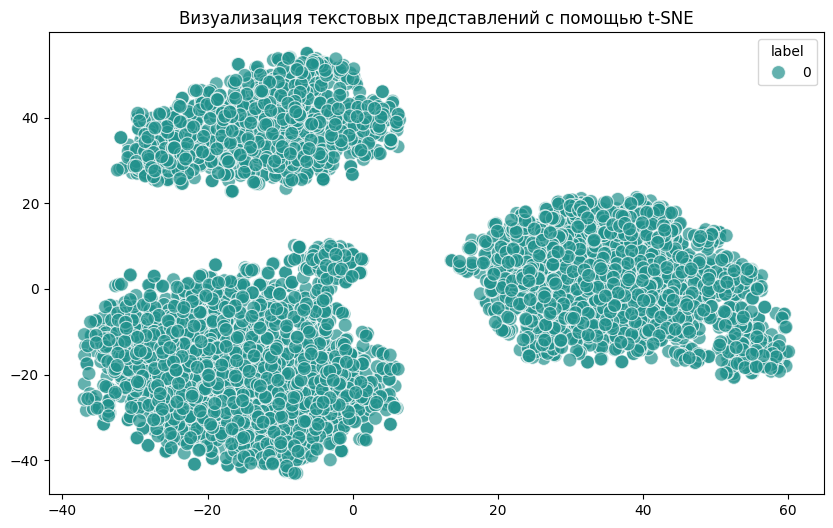

In [37]:
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df['text']).toarray()

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['label'], palette='viridis', s=100, alpha=0.7)
plt.title("Визуализация текстовых представлений с помощью t-SNE")
plt.show()

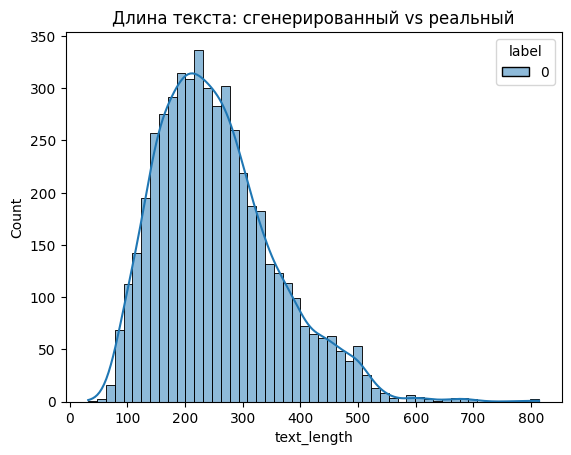

In [38]:
sns.histplot(data=df, x='text_length', hue='label', kde=True)
plt.title("Длина текста: сгенерированный vs реальный")
plt.show()

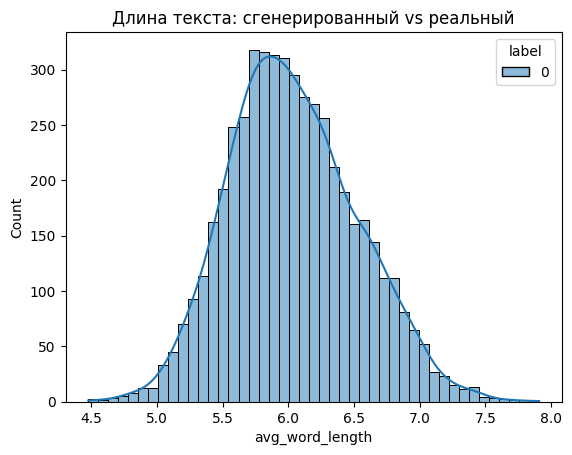

In [39]:
sns.histplot(data=df, x='avg_word_length', hue='label', kde=True)
plt.title("Длина текста: сгенерированный vs реальный")
plt.show()

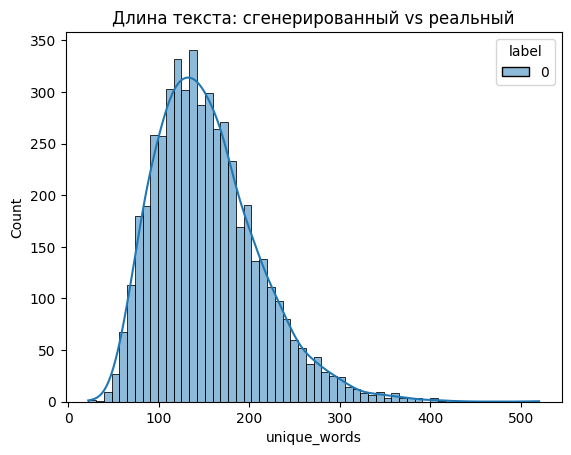

In [40]:
sns.histplot(data=df, x='unique_words', hue='label', kde=True)
plt.title("Длина текста: сгенерированный vs реальный")
plt.show()

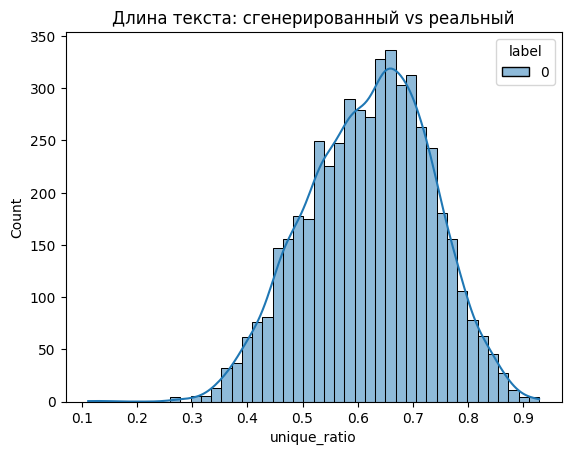

In [41]:
sns.histplot(data=df, x='unique_ratio', hue='label', kde=True)
plt.title("Длина текста: сгенерированный vs реальный")
plt.show()

In [48]:
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer("english")
stems = [snowball.stem(word) for word in words_token]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [50]:
stems

['phone',
 'modern',
 'human',
 'today',
 'alway',
 'phone',
 'alway',
 'phone',
 '5',
 'hour',
 'day',
 'stop',
 'text',
 'back',
 'forward',
 'group',
 'chat',
 'social',
 'media',
 'even',
 'drive',
 'realli',
 'bad',
 'consequ',
 'stuff',
 'happen',
 'come',
 'phone',
 'certain',
 'area',
 'unit',
 'state',
 'ban',
 'phone',
 'class',
 'room',
 'peopl',
 'phone',
 'know',
 'certain',
 'app',
 'app',
 'like',
 'facebook',
 'twitter',
 'instagram',
 'snapchat',
 'like',
 'friend',
 'move',
 'away',
 'want',
 'contact',
 'still',
 'contact',
 'post',
 'video',
 'text',
 'messag',
 'peopl',
 'alway',
 'differ',
 'way',
 'communic',
 'phone',
 'phone',
 'chang',
 'due',
 'generat',
 'drive',
 'one',
 'way',
 'get',
 'around',
 'peopl',
 'alway',
 'phone',
 'caus',
 'serious',
 'problem',
 'that',
 'there',
 'thing',
 'that',
 'call',
 'text',
 'drive',
 'that',
 'realli',
 'import',
 'thing',
 'rememb',
 'peopl',
 'still',
 'think',
 'stupid',
 'matter',
 'still',
 'obey',
 'that',
 'wa

In [49]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

lemmas = [lemmatizer.lemmatize(word) for word in words_token]

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [51]:
lemmas

['phone',
 'modern',
 'human',
 'today',
 'always',
 'phone',
 'always',
 'phone',
 '5',
 'hour',
 'day',
 'stop',
 'text',
 'back',
 'forward',
 'group',
 'chat',
 'social',
 'medium',
 'even',
 'driving',
 'really',
 'bad',
 'consequence',
 'stuff',
 'happens',
 'come',
 'phone',
 'certain',
 'area',
 'united',
 'state',
 'ban',
 'phone',
 'class',
 'room',
 'people',
 'phone',
 'know',
 'certain',
 'apps',
 'apps',
 'like',
 'facebook',
 'twitter',
 'instagram',
 'snapchat',
 'like',
 'friend',
 'move',
 'away',
 'want',
 'contact',
 'still',
 'contact',
 'posting',
 'video',
 'text',
 'message',
 'people',
 'always',
 'different',
 'way',
 'communicate',
 'phone',
 'phone',
 'changed',
 'due',
 'generation',
 'driving',
 'one',
 'way',
 'get',
 'around',
 'people',
 'always',
 'phone',
 'cause',
 'serious',
 'problem',
 'thats',
 'there',
 'thing',
 'thats',
 'called',
 'texting',
 'driving',
 'thats',
 'really',
 'important',
 'thing',
 'remember',
 'people',
 'still',
 'think',
 